In [1]:
using QuadraticTeamDecisionSolver, Distributions, Statistics, LinearAlgebra, Plots, LaTeXStrings

In [2]:
N = 2;
σᵣ = 1.0;
p = QuadTeamProblem(N, N*N*ones(Int64, N), ones(Int64, N), ComplexF64);
t = teamMMSEproblem(σᵣ, zeros(Float64, N), ones(Float64, N), zeros(Float64, N), 0.5*ones(Float64, N), 0.0*ones(Float64, N));

In [149]:
m = 10000;
iterations = 5;
Y, R, r = generateTeamMMSEsamples(p, t, m);

In [150]:
m^(-2/(2+4))

0.046415888336127795

In [158]:
k(x,y) = exp(real(dot(x,y))) #try different kernels
regression(Y, X) = kernelInterpolation(k, Y, X, λ=1.0)
regressor(w, X, x) = kernelFunction(k, w, X, x)

regressor (generic function with 1 method)

In [159]:
w_jacobi = [[rand(ComplexF64, m)] for _ in 1:p.N];
empiricalAlternatingSolver!(p, w_jacobi, Y, R, r, regression, regressor, iterations = iterations, );

In [160]:
conv_jacobi = [norm.(diff(w_jacobi[i])) for i in 1:p.N];

In [161]:
testR = reformatR(p.N, m, R);
testr = reformatr(p.N, m, r);
testW_jacobi = reformatW(p.N, m, iterations, w_jacobi);

In [162]:
perf_jacobi = [urisk(testW_jacobi[k], testR, testr) for k in 1:iterations]

5-element Vector{Float64}:
 3.1788696941848666
 0.2312907394994527
 0.1018404813697701
 0.09889175235917735
 0.09906970853105518

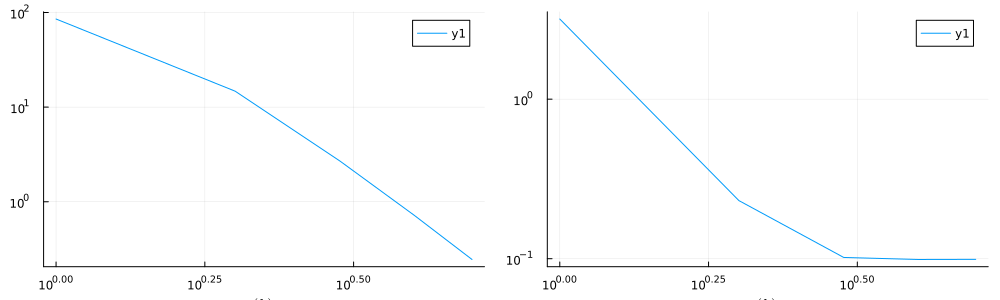

In [163]:
conv = plot(sum(conv_jacobi) / p.N, xscale = :log10,  yscale = :log10, xlabel = L"(k)");
perf = plot(perf_jacobi, yscale = :log10, xscale = :log10, xlabel = L"(k)");
plot(conv, perf, layout = (1, 2), size = (1000, 300))


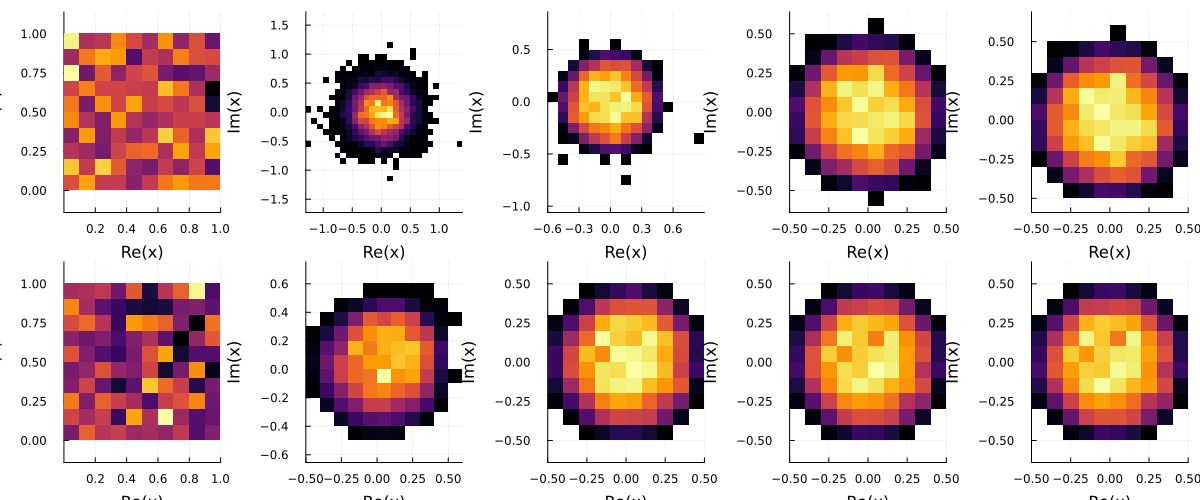

In [164]:
# Step 2: Create a 1x5 grid of subplots
plot_layout = plot(layout=(2, iterations), legend=false)

# Step 3: Generate histograms and add them to the grid
for k in 1:iterations
    h1 = histogram2d(w_jacobi[1][k], normalize=:pdf, show_empty_bins=false, normed=true, aspect_ratio=1)
    histogram2d!(plot_layout[k], w_jacobi[1][k], normalize=:pdf, show_empty_bins=false, normed=true, aspect_ratio=1)

    h2 = histogram2d(w_jacobi[2][k], normalize=:pdf, show_empty_bins=false, normed=true, aspect_ratio=1)
    histogram2d!(plot_layout[2, k], w_jacobi[2][k], normalize=:pdf, show_empty_bins=false, normed=true, aspect_ratio=1)
end

# Step 4: Show the plot
plot(plot_layout, size=(1200,500))
